# **Compute Sentiment Using 4 SyuzhetR and 7 SentimentR Models**

* https://www.youtube.com/watch?v=U3ByGh8RmSc

* https://github.com/ttimbers/intro-to-reticulate

[Use R on Google Colab!](https://colab.research.google.com/notebook#create=true&language=r)

# **[STEP 1] Manual Configuration/Setup**



## (Popups) Connect Google gDrive

In [1]:
# [INPUT REQUIRED]: Authorize access to Google gDrive

# Connect this Notebook to your permanent Google Drive
#   so all generated output is saved to permanent storage there

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Attempting to attach your Google gDrive to this Colab Jupyter Notebook")
  drive.mount('/gdrive', force_remount=True)
else:
  print("Your Google gDrive is attached to this Colab Jupyter Notebook")

Attempting to attach your Google gDrive to this Colab Jupyter Notebook
Mounted at /gdrive


## (3 Inputs) Define Directory Tree

In [2]:
# [CUSTOMIZE]: Change the text after the Unix '%cd ' command below (change directory)
#              to math the full path to your gDrive subdirectory which should be the 
#              root directory cloned from the SentimentArcs github repo.

# NOTE: Make sure this subdirectory already exists and there are 
#       no typos, spaces or illegals characters (e.g. periods) in the full path after %cd

# NOTE: In Python all strings must begin with an upper or lowercase letter, and only
#         letter, number and underscores ('_') characters should appear afterwards.
#         Make sure your full path after %cd obeys this constraint or errors may appear.

# #@markdown **Instructions**

# #@markdown Set Directory and Corpus names:
# #@markdown <li> Set <b>Path_to_SentimentArcs</b> to the project root in your **GDrive folder**
# #@markdown <li> Set <b>Corpus_Genre</b> = [novels, finance, social_media]
# #@markdown <li> <b>Corpus_Type</b> = [reference_corpus, new_corpus]
# #@markdown <li> <b>Corpus_Number</b> = [1-20] (id nunmber if a new_corpus)

#@markdown <hr>

# Step #1: Get full path to SentimentArcs subdir on gDrive
# =======
#@markdown **Accept default path on gDrive or Enter new one:**

Path_to_SentimentArcs = "/gdrive/MyDrive/sentimentarcs_notebooks/" #@param ["/gdrive/MyDrive/sentiment_arcs/"] {allow-input: true}


#@markdown Set this to the project root in your <b>GDrive folder</b>
#@markdown <br> (e.g. /<wbr><b>gdrive/MyDrive/research/sentiment_arcs/</b>)

#@markdown <hr>

#@markdown **Which type of texts are you cleaning?** \

Corpus_Genre = "novels" #@param ["novels", "social_media", "finance"]

# Corpus_Type = "reference" #@param ["new", "reference"]
Corpus_Type = "new" #@param ["new", "reference"]


Corpus_Number = 5 #@param {type:"slider", min:1, max:10, step:1}


#@markdown Put in the corresponding Subdirectory under **./text_raw**:
#@markdown <li> All Texts as clean <b>plaintext *.txt</b> files 
#@markdown <li> A <b>YAML Configuration File</b> describing each Texts

#@markdown Please verify the required textfiles and YAML file exist in the correct subdirectories before continuing.

print('Current Working Directory:')
%cd $Path_to_SentimentArcs

print('\n')

if Corpus_Type == 'reference':
  SUBDIR_SENTIMENT_RAW = f'sentiment_raw_{Corpus_Genre}_reference'
  SUBDIR_TEXT_CLEAN = f'text_clean_{Corpus_Genre}_reference'
else:
  SUBDIR_SENTIMENT_RAW = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'
  SUBDIR_TEXT_CLEAN = f'text_clean_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'

# PATH_SENTIMENT_RAW = f'./sentiment_raw/{SUBDIR_TEXT_RAW}'
# PATH_TEXT_CLEAN = f'./text_clean/{SUBDIR_TEXT_CLEAN}'
PATH_SENTIMENT_RAW = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
PATH_TEXT_CLEAN = f'./text_clean/{SUBDIR_TEXT_CLEAN}'

# TODO: Clean up
# SUBDIR_TEXT_CLEAN = PATH_TEXT_CLEAN

print(f'PATH_SENTIMENT_RAW:\n  [{PATH_SENTIMENT_RAW}]')
print(f'SUBDIR_SENTIMENT_RAW:\n  [{SUBDIR_SENTIMENT_RAW}]')

print('\n')

print(f'PATH_TEXT_CLEAN:\n  [{PATH_TEXT_CLEAN}]')
print(f'SUBDIR_TEXT_CLEAN:\n  [{SUBDIR_TEXT_CLEAN}]')

Current Working Directory:
/gdrive/MyDrive/sentimentarcs_notebooks


PATH_SENTIMENT_RAW:
  [./sentiment_raw/sentiment_raw_novels_new_corpus5/]
SUBDIR_SENTIMENT_RAW:
  [sentiment_raw_novels_new_corpus5/]


PATH_TEXT_CLEAN:
  [./text_clean/text_clean_novels_new_corpus5/]
SUBDIR_TEXT_CLEAN:
  [text_clean_novels_new_corpus5/]


# **[STEP 2] Automatic Configuration/Setup**

In [3]:
# Add PATH for ./utils subdirectory

import sys
import os

!python --version

print('\n')

PATH_UTILS = f'{Path_to_SentimentArcs}utils'
PATH_UTILS

sys.path.append(PATH_UTILS)

print('Contents of Subdirectory [./sentiment_arcs/utils/]\n')
!ls $PATH_UTILS

# More Specific than PATH for searching libraries
# !echo $PYTHONPATH

Python 3.7.13


Contents of Subdirectory [./sentiment_arcs/utils/]

config_matplotlib.py   get_subdirs.py	    sentiment_analysis.py
config_seaborn.py      global_constants.py  sentiment_arcs_config.py
file_utils.py	       global_vars.py	    set_globals.py
get_fullpath.py        __init__.py	    subdir_constants.py
get_model_families.py  __pycache__	    text_cleaners_new.py
get_sentimentr.R       read_yaml.py	    text_cleaners.py
get_sentiments.py      sa_config.py


In [4]:
# Review Global Variables and set the first few

import global_vars as global_vars

global_vars.SUBDIR_SENTIMENTARCS = Path_to_SentimentArcs
global_vars.Corpus_Genre = Corpus_Genre
global_vars.Corpus_Type = Corpus_Type
global_vars.Corpus_Number = Corpus_Number

global_vars.SUBDIR_SENTIMENT_RAW = SUBDIR_SENTIMENT_RAW
global_vars.PATH_SENTIMENT_RAW = PATH_SENTIMENT_RAW

global_vars.SUBDIR_TEXT_CLEAN = SUBDIR_TEXT_CLEAN
global_vars.PATH_TEXT_CLEAN = PATH_TEXT_CLEAN

dir(global_vars)

['Corpus_Genre',
 'Corpus_Number',
 'Corpus_Type',
 'FNAME_SENTIMENT_RAW',
 'MIN_PARAG_LEN',
 'MIN_SENT_LEN',
 'NotebookModels',
 'PATH_SENTIMENT_RAW',
 'PATH_TEXT_CLEAN',
 'PATH_TEXT_RAW_CORPUS',
 'SLANG_DT',
 'STOPWORDS_ADD_EN',
 'STOPWORDS_DEL_EN',
 'SUBDIR_CRUXES',
 'SUBDIR_DATA',
 'SUBDIR_GRAPHS',
 'SUBDIR_SENTIMENTARCS',
 'SUBDIR_SENTIMENT_CLEAN',
 'SUBDIR_SENTIMENT_RAW',
 'SUBDIR_TEXT_CLEAN',
 'SUBDIR_TEXT_RAW',
 'SUBDIR_TIMESERIES_CLEAN',
 'SUBDIR_TIMESERIES_RAW',
 'SUBDIR_UTILS',
 'TEST_SENTENCES_LS',
 'TEST_WORDS_LS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'corpus_texts_dt',
 'corpus_titles_dt',
 'corpus_titles_ls',
 'lexicons_dt',
 'model_ensemble_dt',
 'model_titles_dt']

## (each time) Custom Libraries & Define Globals

In [6]:
# Initialize and clean for each iteration of notebook

# dir(global_vars)

global_vars.corpus_texts_dt = {}
global_vars.corpus_titles_dt = {}

In [7]:
# Import SentimentArcs Utilities to define Directory Structure
#   based the Selected Corpus Genre, Type and Number

!pwd 
print('\n')

# from utils import sa_config # .sentiment_arcs_utils
from utils import sa_config

print('Objects in sa_config()')
print(dir(sa_config))
print('\n')

# Directory Structure for the Selected Corpus Genre, Type and Number
sa_config.get_subdirs(Path_to_SentimentArcs, Corpus_Genre, Corpus_Type, Corpus_Number, 'none')


/gdrive/MyDrive/sentimentarcs_notebooks


Objects in sa_config()
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'get_subdirs', 'global_vars', 'set_globals']


Verify the Directory Structure:

-------------------------------

           [Corpus Genre]: novels

            [Corpus Type]: new


    [FNAME_SENTIMENT_RAW]: [NONE]




INPUTS:
-------------------------------

   [SUBDIR_SENTIMENTARCS]: /gdrive/MyDrive/sentimentarcs_notebooks/


STEP 1: Clean Text
--------------------

        [SUBDIR_TEXT_RAW]: ./text_raw/text_raw_novels_new_corpus5/

      [SUBDIR_TEXT_CLEAN]: ./text_clean/text_clean_novels_new_corpus5/


STEP 2: Get Sentiments
--------------------

   [SUBDIR_SENTIMENT_RAW]: ./sentiment_raw/sentiment_raw_novels_new_corpus5/

 [SUBDIR_SENTIMENT_CLEAN]: ./sentiment_clean/sentiment_clean_novels_new_corpus5/


STEP 3: Smooth Time Series and Get Crux Points
--------------------

  [SUBDIR_TIMESERIES_RAW]: ./sentiment_ra

In [9]:
# TODO: fix
# global_vars.SUBDIR_GRAPHS = './graphs/graphs_novels_new_corpus5/'

In [10]:
# Call SentimentArcs Utility to define Global Variables

sa_config.set_globals()

# Verify sample global var set
print(f'MIN_PARAG_LEN: {global_vars.MIN_PARAG_LEN}')
print(f'STOPWORDS_ADD_EN: {global_vars.STOPWORDS_ADD_EN}')
print(f'TEST_WORDS_LS: {global_vars.TEST_WORDS_LS}')
print(f'SLANG_DT: {global_vars.SLANG_DT}')

MIN_PARAG_LEN: 10
STOPWORDS_ADD_EN: ['a', 'the', 'an']
TEST_WORDS_LS: ['Love', 'Hate', 'bizarre', 'strange', 'furious', 'elated', 'curious', 'beserk', 'gambaro']
SLANG_DT: {'$': ' dollar ', '€': ' euro ', '4ao': 'for adults only', 'a.m': 'before midday', 'a3': 'anytime anywhere anyplace', 'aamof': 'as a matter of fact', 'acct': 'account', 'adih': 'another day in hell', 'afaic': 'as far as i am concerned', 'afaict': 'as far as i can tell', 'afaik': 'as far as i know', 'afair': 'as far as i remember', 'afk': 'away from keyboard', 'app': 'application', 'approx': 'approximately', 'apps': 'applications', 'asap': 'as soon as possible', 'asl': 'age, sex, location', 'atk': 'at the keyboard', 'ave.': 'avenue', 'aymm': 'are you my mother', 'ayor': 'at your own risk', 'b&b': 'bed and breakfast', 'b+b': 'bed and breakfast', 'b.c': 'before christ', 'b2b': 'business to business', 'b2c': 'business to customer', 'b4': 'before', 'b4n': 'bye for now', 'b@u': 'back at you', 'bae': 'before anyone else', '

## Configure Jupyter Notebook

In [11]:
# Configure Jupyter

# To reload modules under development

# Option (a)
%load_ext autoreload
%autoreload 2
# Option (b)
# import importlib
# importlib.reload(functions.readfunctions)


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets, interactive

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## (each time) Read YAML Configuration for Corpus and Models 

In [12]:
# from utils import sa_config # .sentiment_arcs_utils

import yaml

from utils import read_yaml

print('Objects in read_yaml()')
print(dir(read_yaml))
print('\n')

# Directory Structure for the Selected Corpus Genre, Type and Number
read_yaml.read_corpus_yaml(Corpus_Genre, Corpus_Type, Corpus_Number)

print('SentimentArcs Model Ensemble ------------------------------\n')
model_titles_ls = global_vars.models_titles_dt.keys()
print('\n'.join(model_titles_ls))


print('\n\nCorpus Texts ------------------------------\n')
corpus_titles_ls = list(global_vars.corpus_titles_dt.keys())
print('\n'.join(corpus_titles_ls))


print(f'\n\nThere are {len(model_titles_ls)} Models in the SentimentArcs Ensemble above.\n')
print(f'\nThere are {len(corpus_titles_ls)} Texts in the Corpus above.\n')
print('\n')

global_vars.corpus_titles_dt

Objects in read_yaml()
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'global_vars', 'read_corpus_yaml', 'yaml']


YAML Directory: text_raw/text_raw_novels_new_corpus5
YAML File: text_raw_novels_new_corpus5_info.yaml
SentimentArcs Model Ensemble ------------------------------

AutoGluon_Text
BERT_2IMDB
BERT_Dual_Coding
BERT_Multilingual
BERT_Yelp
CNN_DNN
Distilled_BERT
FLAML_AutoML
Fully_Connected_Network
HyperOpt_CNN_Flair_AutoML
LSTM_DNN
Logistic_Regression
Logistic_Regression_CV
Multilingual_CNN_Stanza_AutoML
Multinomial_Naive_Bayes
Pattern
Random_Forest
RoBERTa_Large_15DB
RoBERTa_XML_8Language
FinBERT
FinBERT_Tone
DistilRoBERTa_FinNews
SentimentR_JockersRinker
SentimentR_Jockers
SentimentR_Bing
SentimentR_NRC
SentimentR_SentiWord
SentimentR_SenticNet
SentimentR_LMcD
SentimentR_SentimentR
PySentimentR_JockersRinker
PySentimentR_Huliu
PySentimentR_NRC
PySentimentR_SentiWord
PySentimentR_SenticNet
PySentimentR_LMcD
SyuzhetR_A

{'pkdick_doandroidsdreamofelectricsheep': ['Do Androids Dream of Electric Sheep by Philip K. Dick',
  1968,
  0]}

## Install Libraries: R

In [13]:
# !pip install rpy2

In [14]:
# !pip install -U rpy2

In [15]:
# Load Jupyter rpy2 Extension  
#   enables the %%R magic commands

%load_ext rpy2.ipython

# %reload_ext rpy2.ipython

2022-04-20 03:05:19,708 : INFO : NumExpr defaulting to 2 threads.


In [16]:
%%time 
%%capture 
%%R

# Install Syuzhet.R, Sentiment.R and Utility Libraries

# NOTE: 1m12s 
#       1m05s

#       1m13s 00:47 @20220406Wed Novels Corpus1 2 Novels

install.packages(c('syuzhet', 'sentimentr', 'tidyverse', 'lexicon'))

library(syuzhet)
library(sentimentr)
library(tidyverse)
library(lexicon)

2022-04-20 03:05:20,180 : WARNING : R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

2022-04-20 03:05:21,436 : WARNING : R[write to console]: also installing the dependencies ‘slam’, ‘english’, ‘mgsub’, ‘qdapRegex’, ‘textshape’, ‘NLP’, ‘zoo’, ‘dtt’, ‘textclean’


2022-04-20 03:05:21,444 : WARNING : R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/slam_0.1-50.tar.gz'

2022-04-20 03:05:21,653 : WARNING : R[write to console]: Content type 'application/x-gzip'
2022-04-20 03:05:21,655 : WARNING : R[write to console]:  length 53641 bytes (52 KB)

2022-04-20 03:05:21,657 : WARNING : R[write to console]: =
2022-04-20 03:05:21,662 : WARNING : R[write to console]: =
2022-04-20 03:05:21,663 : WARNING : R[write to console]: =
2022-04-20 03:05:21,665 : WARNING : R[write to console]: =
2022-04-20 03:05:21,670 : WARNING : R[write to console]: =
2022-04-20 03:05:21,671 : WARNING : R[write to console]: =
2022-04-20 03:05:21,67

CPU times: user 4.73 s, sys: 529 ms, total: 5.26 s
Wall time: 1min 19s


In [17]:
# Load Python libraries to exchange data with R Program Space and read R Datafiles

import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

In [18]:
%%R

# Verify R in Kernel Version
# R.version.string

# Verfiy R Kernel Environment
# Sys.getenv

# Verify R Kernel Session Info
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] lexicon_1.2.1    forcats_0.5.1    stringr_1.4.0    dplyr_1.0.8     
 [5] purrr_0.3.4      readr_2.1.2      tidyr_1.2.0      tibble_3.1.6    
 [9] ggplot2_3.3.5    tidyverse_1.3.1  sentimentr_2.9.0 syuzhet_1.0.6   

loaded via a namespace (and not atta

## Install Libraries: Python

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from glob import glob
import copy
import json # Installed above in YAML Configuration Section

## Setup Matplotlib Style

* https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [20]:
# Configure Matplotlib

# View available styles
# plt.style.available

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_matplotlib.py'

config_matplotlib()

print('Matplotlib Configuration ------------------------------')
print('\n  (Uncomment to view)')
# plt.rcParams.keys()
print('\n  Edit ./utils/config_matplotlib.py to change')




 New figure size:  (20, 10)
Matplotlib Configuration ------------------------------

  (Uncomment to view)

  Edit ./utils/config_matplotlib.py to change


In [21]:
"""
from cycler import cycler

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']   
linestyles = ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--']

cycle = plt.cycler("color", colors) + plt.cycler("linestyle", linestyles)

# View previous matplotlib configuration
print('\n Old Matplotlib Configurtion Settings:\n')
# plt.rc.show
print('\n\n')

# Update and view new matplotlib configuration
print('\n New Matplotlib Configurtion Settings:\n')
myparams = {'axes.prop_cycle': cycle}
plt.rcParams.update(myparams)

plt.rcParams["axes.titlesize"] = 16
plt.rcParams['figure.figsize'] = 20,10
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 12

# Set matplotlib plot figure.figsize

new_plt_size = plt.rcParams["figure.figsize"]=(20,10)

print(" New figure size: ",new_plt_size)
""";

## Setup Seaborn Style

In [22]:
# Configure Seaborn

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_seaborn.py'

config_seaborn()

print('Seaborn Configuration ------------------------------\n')
# print('\n  Update ./utils/config_seaborn.py to display seaborn settings')

"""
# Seaborn: Set Context
# sns.set_context("notebook")

# Seaborn: Set Theme (Scale of Font)
sns.set_theme('paper')  # paper, notebook, talk, poster

# Seaborn: Set Style
# sns.set_style('ticks') # darkgrid, whitegrid, dark, white, and ticks
plt.style.use('seaborn-whitegrid')

# sns.set_palette('tab10')
# sns.color_palette()

# sns.set_palette('tab10')
# sns.color_palette()
""";




Seaborn Configuration ------------------------------



In [23]:
"""
# Configure Seaborn

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_seaborn.py'

config_seaborn()

print('Seaborn Configuration ------------------------------\n')
# print('\n  Update ./utils/config_seaborn.py to display seaborn settings')
# View previous seaborn configuration
print('\n Old Seaborn Configurtion Settings:\n')
sns.axes_style()
print('\n\n')

# Update and View new seaborn configuration
print('\n New Seaborn Configurtion Settings:\n')
# sns.set_style('white')
sns.set_context('paper')
sns.set_style('white')
sns.set_palette('tab10')

# Change defaults
# sns.set(style='white', context='talk', palette='tab10')
""";

## Python Utility Functions

### (each time) Generate Convenient Data Lists

In [24]:
# Derive List of Texts in Corpus a)keys and b)full author and titles

print('Dictionary: corpus_titles_dt')
global_vars.corpus_titles_dt
print('\n')

corpus_texts_ls = list(global_vars.corpus_titles_dt.keys())
print(f'\nCorpus Texts:')
for akey in corpus_texts_ls:
  print(f'  {akey}')
print('\n')

print(f'\nNatural Corpus Titles:')
corpus_titles_ls = [x[0] for x in list(global_vars.corpus_titles_dt.values())]
for akey in corpus_titles_ls:
  print(f'  {akey}')


Dictionary: corpus_titles_dt


{'pkdick_doandroidsdreamofelectricsheep': ['Do Androids Dream of Electric Sheep by Philip K. Dick',
  1968,
  0]}




Corpus Texts:
  pkdick_doandroidsdreamofelectricsheep



Natural Corpus Titles:
  Do Androids Dream of Electric Sheep by Philip K. Dick


In [25]:
# Get Model Families of Ensemble

from utils.get_model_families import get_ensemble_model_famalies

global_vars.models_ensemble_dt = get_ensemble_model_famalies(global_vars.models_titles_dt)

print('\nTest: Lexicon Family of Models:')
global_vars.models_ensemble_dt['lexicon']


There are 12 Lexicon Models
  Lexicon Model #0: sentimentr_sentimentr
  Lexicon Model #1: pysentimentr_jockersrinker
  Lexicon Model #2: pysentimentr_huliu
  Lexicon Model #3: pysentimentr_nrc
  Lexicon Model #4: pysentimentr_sentiword
  Lexicon Model #5: pysentimentr_senticnet
  Lexicon Model #6: pysentimentr_lmcd
  Lexicon Model #7: syuzhetr_afinn
  Lexicon Model #8: syuzhetr_bing
  Lexicon Model #9: syuzhetr_nrc
  Lexicon Model #10: syuzhetr_syuzhetr
  Lexicon Model #11: afinn

There are 9 Heuristic Models
  Heuristic Model #0: pattern
  Heuristic Model #1: sentimentr_jockersrinker
  Heuristic Model #2: sentimentr_jockers
  Heuristic Model #3: sentimentr_bing
  Heuristic Model #4: sentimentr_nrc
  Heuristic Model #5: sentimentr_sentiword
  Heuristic Model #6: sentimentr_senticnet
  Heuristic Model #7: sentimentr_lmcd
  Heuristic Model #8: vader

There are 8 Traditional ML Models
  Traditional ML Model #0: autogluon
  Traditional ML Model #1: flaml
  Traditional ML Model #2: logreg


['sentimentr_sentimentr',
 'pysentimentr_jockersrinker',
 'pysentimentr_huliu',
 'pysentimentr_nrc',
 'pysentimentr_sentiword',
 'pysentimentr_senticnet',
 'pysentimentr_lmcd',
 'syuzhetr_afinn',
 'syuzhetr_bing',
 'syuzhetr_nrc',
 'syuzhetr_syuzhetr',
 'afinn']

### File Functions

In [26]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/file_utils.py'
# from utils.file_utils import *

# %run -i './utils/file_utils.py'

# TODO: Not used? Delete?
# get_fullpath(text_title_str, ftype='data_clean', fig_no='', first_note = '',last_note='', plot_ext='png', no_date=False)

# **[STEP 3] Read all Preprocessed Novels**

In [27]:
!ls {Path_to_SentimentArcs}{PATH_TEXT_CLEAN}

pkdick_doandroidsdreamofelectricsheep.csv


In [28]:
# Verify cwd and subdir of Cleaned Corpus Texts

print('Current Working Directory:')
!pwd

print(f'\nSubdir with all Cleaned Texts of Corpus:\n  {SUBDIR_TEXT_CLEAN}')

print(f'\n\nFilenames of Cleaned Texts:\n')
!ls -1 {Path_to_SentimentArcs}{PATH_TEXT_CLEAN}

Current Working Directory:
/gdrive/MyDrive/sentimentarcs_notebooks

Subdir with all Cleaned Texts of Corpus:
  text_clean_novels_new_corpus5/


Filenames of Cleaned Texts:

pkdick_doandroidsdreamofelectricsheep.csv


In [29]:
# Create a List (preprocessed_ls) of all preprocessed text files

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

try:
    preprocessed_ls = glob(f'{PATH_TEXT_CLEAN}/*.csv')
    preprocessed_ls = [x.split('/')[-1] for x in preprocessed_ls]
    preprocessed_ls = [x.split('.')[0] for x in preprocessed_ls]
except IndexError:
    raise RuntimeError('No csv file found')

print('\n'.join(preprocessed_ls))
print('\n')
print(f'Found {len(preprocessed_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')

pkdick_doandroidsdreamofelectricsheep


Found 1 Preprocessed files in text_clean_novels_new_corpus5/


In [30]:
# Read all preprocessed text files into master DataFrame (corpus_dt)

corpus_texts_dt = {}

for i,atext in enumerate(preprocessed_ls):
  print(f'Processing #{i}: {atext}...')
  afile_fullpath = f'{PATH_TEXT_CLEAN}/{atext}.csv'
  print(f'               {afile_fullpath}')
  atext_df = pd.read_csv(afile_fullpath, index_col=[0])
  corpus_texts_dt[atext] = atext_df

Processing #0: pkdick_doandroidsdreamofelectricsheep...
               ./text_clean/text_clean_novels_new_corpus5//pkdick_doandroidsdreamofelectricsheep.csv


In [31]:
# Verify the Text read into master Dictionary of DataFrames

corpus_texts_dt.keys()
print('\n')
print(f'There were {len(corpus_texts_dt)} preprocessed Text read into the Dict corpus_texts_dt')

dict_keys(['pkdick_doandroidsdreamofelectricsheep'])



There were 1 preprocessed Text read into the Dict corpus_texts_dt


In [32]:
# Check if there are any Null strings in the text_clean columns

for i, atext in enumerate(list(corpus_texts_dt.keys())):
  print(f'\nText #{i}: {atext}')
  nan_ct = corpus_texts_dt[atext].text_clean.isna().sum()
  if nan_ct > 0:
    print(f'      {nan_ct} Null strings in the text_clean column')


Text #0: pkdick_doandroidsdreamofelectricsheep
      3 Null strings in the text_clean column


In [33]:
corpus_texts_dt.keys()

dict_keys(['pkdick_doandroidsdreamofelectricsheep'])

In [34]:
# Fill in all the Null value of text_clean with placeholder 'empty_string'

for i, atext in enumerate(list(corpus_texts_dt.keys())):
  # print(f'Novel #{i}: {atext}')
  # Fill all text_clean == Null with 'empty_string' so sentimentr::sentiment doesn't break
  corpus_texts_dt[atext][corpus_texts_dt[atext].text_clean.isna()] = 'empty_string'

In [35]:
corpus_texts_ls

['pkdick_doandroidsdreamofelectricsheep']

In [36]:
# Verify DataFrame of first Text in Corpus Dictionary

corpus_texts_dt[corpus_texts_ls[0]].head()

,text_raw,text_clean
0,DO ANDROIDS DREAM OF ELECTRIC SHEEP?,do android dream of electric sheep
1,A merry little surge of electricity piped by a...,a merry little surge of electricity pipe by au...
2,Surprised - it always surprised him to find hi...,surprise it always surprise him to find himsel...
3,"Now, in her bed, his wife Iran opened her gray...",now in her bed his wife iran open her gray unm...
4,"""You set your Penfield too weak he said to her.",you set your penfield too weak he say to her


# **[STEP 4] Get Sentiments with SyuzhetR (4 Models)**

## Compute New SyuzhetR Values

In [37]:
corpus_texts_ls

['pkdick_doandroidsdreamofelectricsheep']

In [38]:
for i, acorpus in enumerate(corpus_texts_ls):
  corpus_texts_dt[acorpus].head()

,text_raw,text_clean
0,DO ANDROIDS DREAM OF ELECTRIC SHEEP?,do android dream of electric sheep
1,A merry little surge of electricity piped by a...,a merry little surge of electricity pipe by au...
2,Surprised - it always surprised him to find hi...,surprise it always surprise him to find himsel...
3,"Now, in her bed, his wife Iran opened her gray...",now in her bed his wife iran open her gray unm...
4,"""You set your Penfield too weak he said to her.",you set your penfield too weak he say to her


In [39]:
# Verify text_clean of sample text

corpus_texts_dt[corpus_texts_ls[0]]['text_clean'].to_list()[:10]

['do android dream of electric sheep',
 'a merry little surge of electricity pipe by automatic alarm from the mood organ beside his bed awaken rick deckard',
 'surprise it always surprise him to find himself awake without prior notice he rise from the bed stand up in his multicolored pajama and stretch',
 'now in her bed his wife iran open her gray unmerry eye blink then groan and shut her eye again',
 'you set your penfield too weak he say to her',
 'i will reset it and you will be awake and',
 'keep your hand off my setting',
 'her voice hold bitter sharpness',
 'i do not want to be awake',
 'he seat himself beside her bend over her and explain softly']

In [40]:
%%time

# Compute Sentiments from all 4 Syuzhet Models applied to all 32 Novels (4 x 32 = 128 runs)

# NOTE:  9m45s 23:30 on 20220114 Colab Pro (33 Novels)
#       28:32s 21:06 on 20220226 Colab Pro (33 Novels)
#        3m20s 19:11 on 20220217 Colab Pro (2 Novels)
#        3m05s 19:17 on 20220217 Colab Pro (2 Novels)

#        2m21s 00:57 @20220406Wed Colab Pro (2 Novels)

#        1h29m 09:24 @20220406Wed Colab Pro (2 Financial Ref: Speeches FedGov & EU CenBank)

#        3m05s 21:13 on 20220415 Colab Pro (3 Novels, 628k, 662k, 897k)
#        3m05s 21:48 on 20220415 Colab Pro (3 Novels, 628k, 662k, 897k)
#        6m03s 07:39 on 20220416 Colab Pro (3 Novels, 628k, 662k, 897k)

#        1m31s 14:23 on 20220419 Colab Pro (1 Novels, 502k)

# base = importr('base')
syuzhet = importr('syuzhet')

# corpus_syuzhetr_dt = {}

# base.rank(0, na_last = True)
texts_titles_ls = list(corpus_texts_dt.keys())
texts_titles_ls.sort()
for i, anovel in enumerate(texts_titles_ls):
  print(f'Processing Novel #{i}: {anovel}...')
  corpus_texts_dt[anovel]['syuzhetr_syuzhet'] = syuzhet.get_sentiment(corpus_texts_dt[anovel]['text_clean'].to_list(), method='syuzhet')
  corpus_texts_dt[anovel]['syuzhetr_bing'] = syuzhet.get_sentiment(corpus_texts_dt[anovel]['text_clean'].to_list(), method='bing')
  corpus_texts_dt[anovel]['syuzhetr_afinn'] = syuzhet.get_sentiment(corpus_texts_dt[anovel]['text_clean'].to_list(), method='afinn')
  corpus_texts_dt[anovel]['syuzhetr_nrc'] = syuzhet.get_sentiment(corpus_texts_dt[anovel]['text_clean'].to_list(), method='nrc')

Processing Novel #0: pkdick_doandroidsdreamofelectricsheep...
CPU times: user 54.3 s, sys: 323 ms, total: 54.6 s
Wall time: 55.2 s


In [41]:
corpus_texts_dt[texts_titles_ls[0]].head()

,text_raw,text_clean,syuzhetr_syuzhet,syuzhetr_bing,syuzhetr_afinn,syuzhetr_nrc
0,DO ANDROIDS DREAM OF ELECTRIC SHEEP?,do android dream of electric sheep,0.25,0,1,1.0
1,A merry little surge of electricity piped by a...,a merry little surge of electricity pipe by au...,1.05,0,1,1.0
2,Surprised - it always surprised him to find hi...,surprise it always surprise him to find himsel...,0.60,0,1,1.0
3,"Now, in her bed, his wife Iran opened her gray...",now in her bed his wife iran open her gray unm...,-0.80,0,-3,-1.0
4,"""You set your Penfield too weak he said to her.",you set your penfield too weak he say to her,-0.50,-1,-2,0.0


In [42]:
# Verify First Text in Corpus has New SyuzhetR Columns with Plausible Values

# corpus_texts_dt[next(iter(corpus_texts_dt))].head()

corpus_texts_dt[texts_titles_ls[0]].head()
corpus_texts_dt[texts_titles_ls[0]].info()

# corpus_texts_dt[texts_titles_ls[1]].head()
# corpus_texts_dt[texts_titles_ls[1]].info()

,text_raw,text_clean,syuzhetr_syuzhet,syuzhetr_bing,syuzhetr_afinn,syuzhetr_nrc
0,DO ANDROIDS DREAM OF ELECTRIC SHEEP?,do android dream of electric sheep,0.25,0,1,1.0
1,A merry little surge of electricity piped by a...,a merry little surge of electricity pipe by au...,1.05,0,1,1.0
2,Surprised - it always surprised him to find hi...,surprise it always surprise him to find himsel...,0.60,0,1,1.0
3,"Now, in her bed, his wife Iran opened her gray...",now in her bed his wife iran open her gray unm...,-0.80,0,-3,-1.0
4,"""You set your Penfield too weak he said to her.",you set your penfield too weak he say to her,-0.50,-1,-2,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820 entries, 0 to 5819
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text_raw          5820 non-null   object 
 1   text_clean        5820 non-null   object 
 2   syuzhetr_syuzhet  5820 non-null   float64
 3   syuzhetr_bing     5820 non-null   int64  
 4   syuzhetr_afinn    5820 non-null   int64  
 5   syuzhetr_nrc      5820 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 318.3+ KB


## Checkpoint: Save SyuzhetR Values

In [43]:
%whos str

Variable                Type    Data/Info
-----------------------------------------
Corpus_Genre            str     novels
Corpus_Type             str     new
PATH_SENTIMENT_RAW      str     ./sentiment_raw/sentiment_raw_novels_new_corpus5/
PATH_TEXT_CLEAN         str     ./text_clean/text_clean_novels_new_corpus5/
PATH_UTILS              str     /gdrive/MyDrive/sentimentarcs_notebooks/utils
Path_to_SentimentArcs   str     /gdrive/MyDrive/sentimentarcs_notebooks/
SUBDIR_SENTIMENT_RAW    str     sentiment_raw_novels_new_corpus5/
SUBDIR_TEXT_CLEAN       str     text_clean_novels_new_corpus5/
acorpus                 str     pkdick_doandroidsdreamofelectricsheep
afile_fullpath          str     ./text_clean/text_clean_n<...>sdreamofelectricsheep.csv
akey                    str     Do Androids Dream of Elec<...>c Sheep by Philip K. Dick
anovel                  str     pkdick_doandroidsdreamofelectricsheep
atext                   str     pkdick_doandroidsdreamofelectricsheep


In [44]:
# Verify in SentimentArcs Root Directory
#   and destination Subdir for Raw Sentiment Values

!pwd
print('\n')

print(f'PATH_SENTIMENT_RAW: {PATH_SENTIMENT_RAW}\n\n')

print('Existing Sentiment Datafiles in Destination Subdir:\n')

!ls $PATH_SENTIMENT_RAW

/gdrive/MyDrive/sentimentarcs_notebooks


PATH_SENTIMENT_RAW: ./sentiment_raw/sentiment_raw_novels_new_corpus5/


Existing Sentiment Datafiles in Destination Subdir:



In [45]:
# Verify Saving Corpus

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

print(f'\nThese Text Titles:\n')
corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW

Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['pkdick_doandroidsdreamofelectricsheep'])


To This Subdirectory:



'./sentiment_raw/sentiment_raw_novels_new_corpus5/'

In [46]:
# Reorder and filter out cols/models to save

syuzhetr_only_dt = {}
cols_syuzhetr_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'\n\nText #{i}: {atext}')
  # print(f'      {corpus_texts_dt[atext].info()}')
  cols_syuzhetr_ls = [x for x in corpus_texts_dt[atext].columns if 'syuzhetr' in x]
  cols_syuzhetr_ls = ['text_raw', 'text_clean'] + cols_syuzhetr_ls
  # print(f'      {cols_syuzhetr_ls}')
  syuzhetr_only_dt[atext] = corpus_texts_dt[atext][cols_syuzhetr_ls]
  syuzhetr_only_dt[atext].columns



Text #0: pkdick_doandroidsdreamofelectricsheep


Index(['text_raw', 'text_clean', 'syuzhetr_syuzhet', 'syuzhetr_bing',
       'syuzhetr_afinn', 'syuzhetr_nrc'],
      dtype='object')

In [47]:
Corpus_Type

'new'

In [48]:
# Save sentiment values to subdir_sentiments

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_all_4syuzhetr.json'
elif Corpus_Type == 'reference':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_all_4syuzhetr.json'
else:
  print(f'ERROR: Illegal Corpus_Type: {Corpus_Type}')

write_dict_dfs(syuzhetr_only_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')

Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus5//sentiment_raw_novels_new_corpus5_all_4syuzhetr.json


In [49]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

total 1867
-rw------- 1 root root 1911427 Apr 20 03:07 sentiment_raw_novels_new_corpus5_all_4syuzhetr.json


In [50]:
corpus_texts_dt[corpus_texts_ls[0]].head()

,text_raw,text_clean,syuzhetr_syuzhet,syuzhetr_bing,syuzhetr_afinn,syuzhetr_nrc
0,DO ANDROIDS DREAM OF ELECTRIC SHEEP?,do android dream of electric sheep,0.25,0,1,1.0
1,A merry little surge of electricity piped by a...,a merry little surge of electricity pipe by au...,1.05,0,1,1.0
2,Surprised - it always surprised him to find hi...,surprise it always surprise him to find himsel...,0.60,0,1,1.0
3,"Now, in her bed, his wife Iran opened her gray...",now in her bed his wife iran open her gray unm...,-0.80,0,-3,-1.0
4,"""You set your Penfield too weak he said to her.",you set your penfield too weak he say to her,-0.50,-1,-2,0.0


## Plot SyuzhetR 4 Models

In [51]:
#@markdown Select option to save plots:
Save_Raw_Plots = True #@param {type:"boolean"}

Save_Smooth_Plots = True #@param {type:"boolean"}
Resolution_in_dpi = "300" #@param ["100", "300"]



In [52]:
# Get Col Names for all 4 SyuzhetR Models

cols_all_ls = corpus_texts_dt[texts_titles_ls[0]].columns

cols_syuzhetr_ls = [x for x in cols_all_ls if 'syuzhetr_' in x]
cols_syuzhetr_ls

['syuzhetr_syuzhet', 'syuzhetr_bing', 'syuzhetr_afinn', 'syuzhetr_nrc']

In [53]:
corpus_texts_dt[corpus_texts_ls[0]].iloc[0]

text_raw            DO ANDROIDS DREAM OF ELECTRIC SHEEP?
text_clean            do android dream of electric sheep
syuzhetr_syuzhet                                    0.25
syuzhetr_bing                                          0
syuzhetr_afinn                                         1
syuzhetr_nrc                                         1.0
Name: 0, dtype: object

In [54]:
global_vars.corpus_titles_dt.keys()

dict_keys(['pkdick_doandroidsdreamofelectricsheep'])

In [55]:
# Save sentiment values to subdir_sentiments

if Corpus_Type == 'new':
  SUBDIR_GRAPHS = f'graphs_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'
  # save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_all_4syuzhetr.json'
elif Corpus_Type == 'reference':
  SUBDIR_GRAPHS = f'graphs_{Corpus_Genre}_{Corpus_Type}/'
  # save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_all_4syuzhetr.json'
else:
  print(f'ERROR: Illegal Corpus_Type: {Corpus_Type}')

SUBDIR_GRAPHS = f'{global_vars.SUBDIR_GRAPHS}{SUBDIR_GRAPHS}'
print(f'Saving to SUBDIR_GRAPHS: {SUBDIR_GRAPHS}')
# print(f'save_filename: {save_filename}')
# write_dict_dfs(syuzhetr_only_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')

Saving to SUBDIR_GRAPHS: ./graphs/graphs_novels_new_corpus5/graphs_novels_new_corpus5/


In [62]:
global_vars.SUBDIR_GRAPHS

'./graphs/graphs_novels_new_corpus5/'

In [64]:
!pwd

/gdrive/MyDrive/sentimentarcs_notebooks


In [66]:
!ls ./graphs/graphs_novels_new_corpus5/

Novel #0: Do Androids Dream of Electric Sheep by Philip K. Dick


Saving to: /gdrive/MyDrive/sentimentarcs_notebooks/graphs/graphs_novels_new_corpus5/plot_pkdick_doandroidsdreamofelectricsheep_syuzhetr_raw_dpi300.png


Saving to: graphs/graphs_novels_new_corpus5/plot_pkdick_doandroidsdreamofelectricsheep_syuzhetr_smooth10sma_dpi300.png


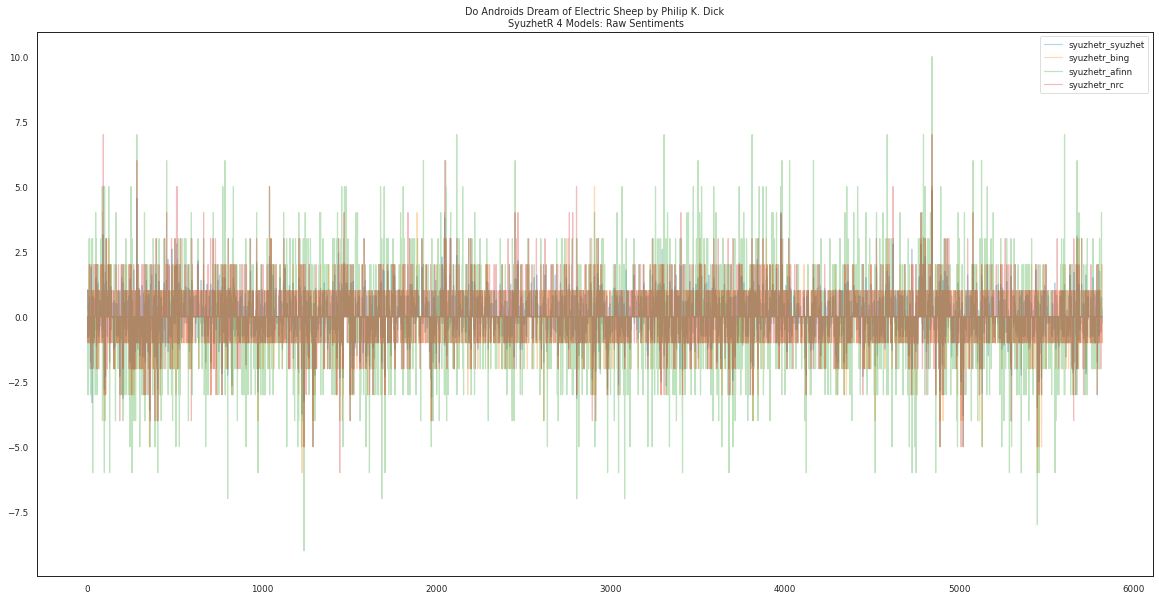

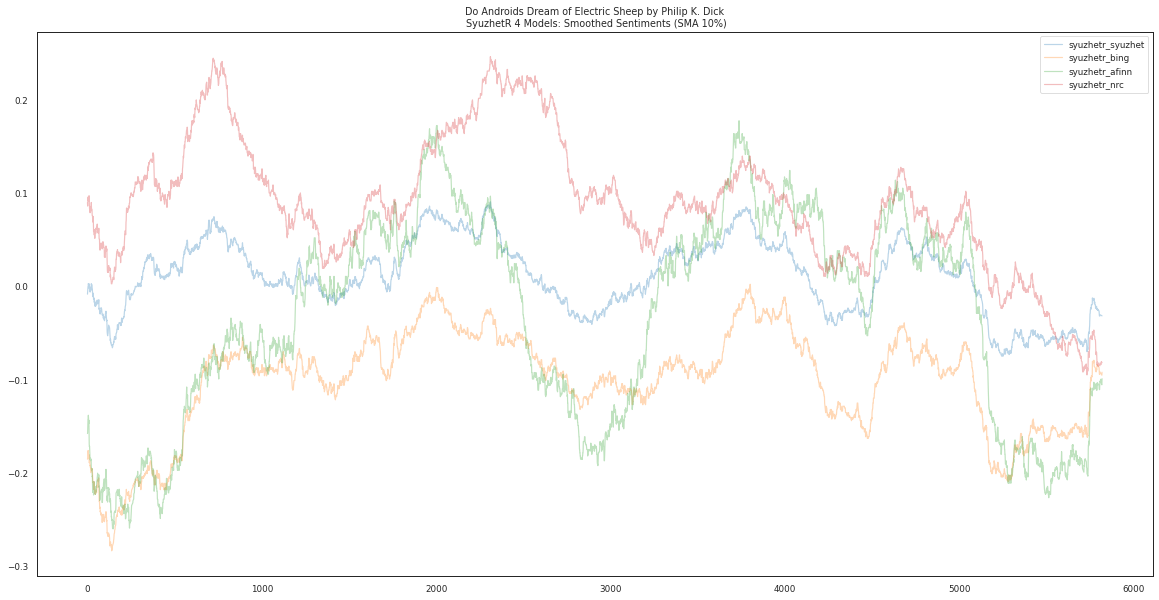

In [69]:
# Verify 4 SyuzhetR Models with Plots

for i, anovel in enumerate(list(corpus_texts_dt.keys())):

  print(f'Novel #{i}: {global_vars.corpus_titles_dt[anovel][0]}')

  # Raw Sentiments 
  fig = corpus_texts_dt[anovel][cols_syuzhetr_ls].plot(title=f'{global_vars.corpus_titles_dt[anovel][0]}\n SyuzhetR 4 Models: Raw Sentiments', alpha=0.3)
  # plt.show();

  if Save_Raw_Plots:
    # save_filename = f'{global_vars.SUBDIR_GRAPHS}plot_{anovel}_syuzhetr_raw_dpi{Resolution_in_dpi}.png'
    save_filename = f'{Path_to_SentimentArcs}{global_vars.SUBDIR_GRAPHS[2:]}plot_{anovel}_syuzhetr_raw_dpi{Resolution_in_dpi}.png'
    print(f'\n\nSaving to: {save_filename}')
    plt.savefig(save_filename, dpi=int(Resolution_in_dpi))

  
  # Smoothed Sentiments (SMA 10%)
  # novel_sample = 'cdickens_achristmascarol'
  win_10per = int(corpus_texts_dt[anovel].shape[0] * 0.1)
  _ = corpus_texts_dt[anovel][cols_syuzhetr_ls].rolling(win_10per, center=True, min_periods=0).mean().plot(title=f'{global_vars.corpus_titles_dt[anovel][0]}\n SyuzhetR 4 Models: Smoothed Sentiments (SMA 10%)', alpha=0.3)
  # plt.show();

  if Save_Smooth_Plots:
    # save_filename = f'{global_vars.SUBDIR_GRAPHS}plot_{anovel}_syuzhetr_smooth10sma_dpi{Resolution_in_dpi}.png'
    save_filename = f'{global_vars.SUBDIR_GRAPHS[2:]}plot_{anovel}_syuzhetr_smooth10sma_dpi{Resolution_in_dpi}.png'
    print(f'\n\nSaving to: {save_filename}')
    plt.savefig(save_filename, dpi=int(Resolution_in_dpi))


# **[STEP 5] Get Sentiments with SentimentR (8 Models)**

## Compute New SentimentR Values

Call function in external get_sentimentr.R from within Python Loop

* https://medium.com/analytics-vidhya/calling-r-from-python-magic-of-rpy2-d8cbbf991571

* https://rpy2.github.io/doc/v3.0.x/html/generated_rst/pandas.html

In [70]:
%%file get_sentimentr.R

library(sentimentr)
library(lexicon)

get_sentimentr_values <- function(s_v) {
  
  print('Processing sentimentr_jockersrinker')
  sentimentr_jockersrinker <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_jockers_rinker, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_jockers')
  sentimentr_jockers <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_jockers, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_huliu')
  sentimentr_huliu <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_huliu, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_nrc')
  sentimentr_nrc <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_nrc, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_senticnet')
  sentimentr_senticnet <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_senticnet, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_sentiword')
  sentimentr_sentiword <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_sentiword, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_loughran_mcdonald')
  sentimentr_loughran_mcdonald <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_loughran_mcdonald, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_socal_google')
  sentimentr_socal_google <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_socal_google, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  anovel_sentimentr_df <- data.frame('text_clean' = s_v,
                                'sentimentr_jockersrinker' = sentimentr_jockersrinker$sentiment,
                                'sentimentr_jockers' = sentimentr_jockers$sentiment,
                                'sentimentr_huliu' = sentimentr_huliu$sentiment,
                                'sentimentr_nrc' = sentimentr_nrc$sentiment,
                                'sentimentr_senticnet' = sentimentr_senticnet$sentiment,
                                'sentimentr_sentiword' = sentimentr_sentiword$sentiment,
                                'sentimentr_loughran_mcdonald' = sentimentr_loughran_mcdonald$sentiment,
                                'sentimentr_socal_google' = sentimentr_socal_google$sentiment
                                )
  return(anovel_sentimentr_df)

}

Overwriting get_sentimentr.R


In [71]:
# Verify the *.R file above was written correctly

!cat get_sentimentr.R


library(sentimentr)
library(lexicon)

get_sentimentr_values <- function(s_v) {
  
  print('Processing sentimentr_jockersrinker')
  sentimentr_jockersrinker <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_jockers_rinker, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_jockers')
  sentimentr_jockers <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_jockers, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_huliu')
  sentimentr_huliu <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_huliu, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
           

In [72]:
# Setup python robject with external library::function()
# https://rpy2.github.io/doc/v3.0.x/html/generated_rst/pandas.html

# import rpy2.robjects as robjects

# Defining the R script and loading the instance in Python
# from rpy2.robjects import pandas2ri 
r = robjects.r

# Loading the function we have defined in R.
r['source']('get_sentimentr.R')

# Reading and processing data
get_sentimentr_function_r = robjects.globalenv['get_sentimentr_values']

value,[RTYPES.CLOSXP]
visible,[RTYPES.LGLSXP]


In [73]:
corpus_texts_dt.keys()

dict_keys(['pkdick_doandroidsdreamofelectricsheep'])

In [74]:
# Test

# Convert Python List of Strings to a R vector of characters
# test_ls = corpus_texts_dt[next(iter(corpus_texts_dt))]['text_clean'].to_list()
test_ls = corpus_texts_dt[corpus_texts_ls[0]]['text_clean'].to_list()
s_v = robjects.StrVector(test_ls)
type(s_v)

get_sentimentr_function_r(s_v)

rpy2.robjects.vectors.StrVector

[1] "Processing sentimentr_jockersrinker"
[1] "Processing sentimentr_jockers"
[1] "Processing sentimentr_huliu"
[1] "Processing sentimentr_nrc"
[1] "Processing sentimentr_senticnet"
[1] "Processing sentimentr_sentiword"
[1] "Processing sentimentr_loughran_mcdonald"
[1] "Processing sentimentr_socal_google"


text_clean,sentimentr_jockersrinker,sentimentr_jockers,...,sentimentr_sentiword,sentimentr_loughran_mcdonald,sentimentr_socal_google
'do andro...,0.102062,0.102062,...,0.089304,0.408248,0.701941
'a merry ...,0.055902,0.055902,,0.029814,0.000000,0.565133
'surprise...,0.240000,0.240000,,0.120833,0.000000,-0.396120
'now in h...,-0.178885,-0.178885,,-0.023292,-0.223607,0.627721
...,...,...,,...,...,...
'i want i...,0.306186,0.306186,,0.242397,0.408248,0.000000
'my husba...,0.000000,0.000000,,0.051031,0.000000,0.000000
'she give...,-0.094491,-0.094491,,0.137800,0.000000,0.000000
'and feel...,0.083205,0.083205,,-0.063162,0.000000,1.048577


In [75]:
text_clean_ct = corpus_texts_dt[corpus_texts_ls[0]].text_clean.isna().sum()
text_clean_ct
# len(text_clean_ls.isnull())

0

**[RE-EXECUTE] May have to re-execute following code cell several times**

In [76]:
%whos dict

Variable           Type    Data/Info
------------------------------------
corpus_texts_dt    dict    n=1
syuzhetr_only_dt   dict    n=1


In [77]:
corpus_texts_dt.keys()

dict_keys(['pkdick_doandroidsdreamofelectricsheep'])

In [78]:
%%time

# NOTE:  8m19s 13 Novels 
#       16m39s 19 Novels
#      -----------------
#       24m58s 32 Novels
#        5m00s  @19:44 on 20220227 Colab Pro (2 Novels)

#        3m18s 21:24 on 20220415 Colab Pro (3 Novels, 628k, 662k, 897k)
#        3m09s 21:45 on 20220415 Colab Pro (3 Novels, 628k, 662k, 897k)

#        3m17s 08:17 on 20220416 Colab Pro (3 Novels, 628k, 662k, 897k)


# Call external get_sentimentr::get_sentimentr_values with Python loop over all novels

# novels_sentimentr_dt = {}

# Reset corpus_texts_dt
# corpus_texts_dt = {}

# TODO: Norm var name to atext_df <- anovel_df
anovel_df = pd.DataFrame()

novels_titles_ls = list(corpus_texts_dt.keys())
novels_titles_ls.sort()
# for i, anovel in enumerate(novels_titles_ls[:19]):
for i, anovel in enumerate(novels_titles_ls):  
  print(f'\nProcessing Novel #{i}: {anovel}')
  
  # Delete contents of anovel_df DataFrame
  anovel_df = anovel_df[0:0]

  print(f'     {corpus_texts_dt[anovel].shape}')
  # Get text_clean as list of strings
  text_clean_ls = corpus_texts_dt[anovel]['text_clean'].to_list()

  # Convert Python List of Strings to a R vector of characters
  # https://rpy2.github.io/doc/v3.0.x/html/generated_rst/pandas.html
  s_v = robjects.StrVector(text_clean_ls)
  anovel_df_r = get_sentimentr_function_r(s_v)

  # Convert rpy2.robjects.vectors.DataFrame to pandas.core.frame.DataFrame
  # https://stackoverflow.com/questions/20630121/pandas-how-to-convert-r-dataframe-back-to-pandas 
  print(f'type(anovel_df_r): {type(anovel_df_r)}')
  anovel_df = pd.DataFrame.from_dict({ key : np.asarray(anovel_df_r.rx2(key)) for key in anovel_df_r.names })
  print(f'type(anovel_df): {type(anovel_df)}')

  # Save Results
  # novels_dt[anovel] = anovel_df.copy(deep=True)

  # This works for Novels New Corpus Texts
  corpus_texts_dt[anovel]['sentimentr_jockersrinker'] = anovel_df['sentimentr_jockersrinker']
  corpus_texts_dt[anovel]['sentimentr_jockers'] = anovel_df['sentimentr_jockers']
  corpus_texts_dt[anovel]['sentimentr_huliu'] = anovel_df['sentimentr_huliu']
  corpus_texts_dt[anovel]['sentimentr_nrc'] = anovel_df['sentimentr_nrc']
  corpus_texts_dt[anovel]['sentimentr_senticnet'] = anovel_df['sentimentr_senticnet']
  corpus_texts_dt[anovel]['sentimentr_sentiword'] = anovel_df['sentimentr_sentiword']
  corpus_texts_dt[anovel]['sentimentr_loughran_mcdonald'] = anovel_df['sentimentr_loughran_mcdonald']
  corpus_texts_dt[anovel]['sentimentr_socal_google'] = anovel_df['sentimentr_socal_google'] 


"""
  # This works for Novels Reference Corpus Texts
  corpus_texts_dt[anovel]['sentimentr_jockersrinker'] = anovel_df[anovel]['sentimentr_jockersrinker']
  corpus_texts_dt[anovel]['sentimentr_jockers'] = anovel_df[anovel]['sentimentr_jockers']
  corpus_texts_dt[anovel]['sentimentr_huliu'] = anovel_df[anovel]['sentimentr_huliu']
  corpus_texts_dt[anovel]['sentimentr_nrc'] = anovel_df[anovel]['sentimentr_nrc']
  corpus_texts_dt[anovel]['sentimentr_senticnet'] = anovel_df[anovel]['sentimentr_senticnet']
  corpus_texts_dt[anovel]['sentimentr_sentiword'] = anovel_df[anovel]['sentimentr_sentiword']
  corpus_texts_dt[anovel]['sentimentr_loughran_mcdonald'] = anovel_df[anovel]['sentimentr_loughran_mcdonald']
  corpus_texts_dt[anovel]['sentimentr_socal_google'] = anovel_df[anovel]['sentimentr_socal_google'] 
""" 


Processing Novel #0: pkdick_doandroidsdreamofelectricsheep
     (5820, 6)
[1] "Processing sentimentr_jockersrinker"
[1] "Processing sentimentr_jockers"
[1] "Processing sentimentr_huliu"
[1] "Processing sentimentr_nrc"
[1] "Processing sentimentr_senticnet"
[1] "Processing sentimentr_sentiword"
[1] "Processing sentimentr_loughran_mcdonald"
[1] "Processing sentimentr_socal_google"
type(anovel_df_r): <class 'rpy2.robjects.vectors.DataFrame'>
type(anovel_df): <class 'pandas.core.frame.DataFrame'>
CPU times: user 31.9 s, sys: 78.3 ms, total: 32 s
Wall time: 31.9 s


In [79]:
anovel_df.head()

,text_clean,sentimentr_jockersrinker,sentimentr_jockers,sentimentr_huliu,sentimentr_nrc,sentimentr_senticnet,sentimentr_sentiword,sentimentr_loughran_mcdonald,sentimentr_socal_google
0,do android dream of electric sheep,0.102062,0.102062,0.000000,0.408248,1.047565,0.089304,0.408248,0.701941
1,a merry little surge of electricity pipe by au...,0.055902,0.055902,-0.178885,-0.134164,0.211935,0.029814,0.000000,0.565133
2,surprise it always surprise him to find himsel...,0.240000,0.240000,0.000000,0.400000,0.177200,0.120833,0.000000,-0.396120
3,now in her bed his wife iran open her gray unm...,-0.178885,-0.178885,0.000000,-0.223607,-0.027056,-0.023292,-0.223607,0.627721
4,you set your penfield too weak he say to her,-0.158114,-0.158114,-0.316228,0.000000,0.053442,-0.071151,-0.316228,-0.426152


In [80]:
corpus_texts_dt[texts_titles_ls[0]].head()

,text_raw,text_clean,syuzhetr_syuzhet,syuzhetr_bing,syuzhetr_afinn,syuzhetr_nrc,sentimentr_jockersrinker,sentimentr_jockers,sentimentr_huliu,sentimentr_nrc,sentimentr_senticnet,sentimentr_sentiword,sentimentr_loughran_mcdonald,sentimentr_socal_google
0,DO ANDROIDS DREAM OF ELECTRIC SHEEP?,do android dream of electric sheep,0.25,0,1,1.0,0.102062,0.102062,0.000000,0.408248,1.047565,0.089304,0.408248,0.701941
1,A merry little surge of electricity piped by a...,a merry little surge of electricity pipe by au...,1.05,0,1,1.0,0.055902,0.055902,-0.178885,-0.134164,0.211935,0.029814,0.000000,0.565133
2,Surprised - it always surprised him to find hi...,surprise it always surprise him to find himsel...,0.60,0,1,1.0,0.240000,0.240000,0.000000,0.400000,0.177200,0.120833,0.000000,-0.396120
3,"Now, in her bed, his wife Iran opened her gray...",now in her bed his wife iran open her gray unm...,-0.80,0,-3,-1.0,-0.178885,-0.178885,0.000000,-0.223607,-0.027056,-0.023292,-0.223607,0.627721
4,"""You set your Penfield too weak he said to her.",you set your penfield too weak he say to her,-0.50,-1,-2,0.0,-0.158114,-0.158114,-0.316228,0.000000,0.053442,-0.071151,-0.316228,-0.426152


In [81]:
cols_sentimentr_ls = [x for x in corpus_texts_dt[corpus_texts_ls[0]].columns if 'sentimentr_' in x]
cols_sentimentr_ls

['sentimentr_jockersrinker',
 'sentimentr_jockers',
 'sentimentr_huliu',
 'sentimentr_nrc',
 'sentimentr_senticnet',
 'sentimentr_sentiword',
 'sentimentr_loughran_mcdonald',
 'sentimentr_socal_google']

In [82]:
# Verify DataFrame shape of first Text in Corpus

corpus_texts_dt[corpus_texts_ls[0]].shape

(5820, 14)

## Checkpoint: Save SentimentR Values

In [83]:
# Verify in SentimentArcs Root Directory
#   and destination Subdir for Raw Sentiment Values

!pwd
print('\n')

print(f'PATH_SENTIMENT_RAW: {PATH_SENTIMENT_RAW}\n\n')

print('Existing Sentiment Datafiles in Destination Subdir:\n')

!ls $PATH_SENTIMENT_RAW

/gdrive/MyDrive/sentimentarcs_notebooks


PATH_SENTIMENT_RAW: ./sentiment_raw/sentiment_raw_novels_new_corpus5/


Existing Sentiment Datafiles in Destination Subdir:

sentiment_raw_novels_new_corpus5_all_4syuzhetr.json


In [84]:
# Verify Saving Corpus

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

print(f'\nThese Text Titles:\n')
corpus_texts_dt.keys()

Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['pkdick_doandroidsdreamofelectricsheep'])

In [85]:
# Reorder and filter out cols/models to save

sentimentr_only_dt = {}
cols_sentimentr_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'\n\nModel #{i}: {atext}')
  # print(f'      {corpus_texts_dt[atext].info()}')
  cols_sentimentr_ls = [x for x in corpus_texts_dt[atext].columns if 'sentimentr' in x]
  cols_sentimentr_ls = ['text_raw', 'text_clean'] + cols_sentimentr_ls
  # print(f'      {cols_syuzhetr_ls}')
  sentimentr_only_dt[atext] = corpus_texts_dt[atext][cols_sentimentr_ls]
  sentimentr_only_dt[atext].columns



Model #0: pkdick_doandroidsdreamofelectricsheep


Index(['text_raw', 'text_clean', 'sentimentr_jockersrinker',
       'sentimentr_jockers', 'sentimentr_huliu', 'sentimentr_nrc',
       'sentimentr_senticnet', 'sentimentr_sentiword',
       'sentimentr_loughran_mcdonald', 'sentimentr_socal_google'],
      dtype='object')

In [86]:
# Save sentiment values to subdir_sentiments

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_all_8sentimentr.json'
elif Corpus_Type == 'reference':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_all_8sentimentr.json'
else:
  print(f'ERROR: Illegal Corpus_Type: {Corpus_Type}')

write_dict_dfs(sentimentr_only_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')

Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus5//sentiment_raw_novels_new_corpus5_all_8sentimentr.json


In [87]:
# Save sentiment values to subdir_sentiments
"""
save_filename = f'all_{Corpus_Genre}_{Corpus_Type}_8sentimentr.json'

write_dict_dfs(sentimentr_only_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')
""";

In [88]:
# Verify Dictionary was saved correctly by reading back the *.json datafile

test_dt = read_dict_dfs(in_file=save_filename, in_dir=f'{PATH_SENTIMENT_RAW}/')
test_dt.keys()

dict_keys(['pkdick_doandroidsdreamofelectricsheep'])

## Plot SentimentR 8 Models

In [89]:
#@markdown Select option to save plots:
Save_Raw_Plots = True #@param {type:"boolean"}

Save_Smooth_Plots = True #@param {type:"boolean"}
Resolution_in_dpi = "300" #@param ["100", "300"]



In [90]:
# Get Col Names for all SentimentR Models
cols_all_ls = corpus_texts_dt[corpus_texts_ls[0]].columns
cols_sentimentr_ls = [x for x in cols_all_ls if 'sentimentr_' in x]
cols_sentimentr_ls

['sentimentr_jockersrinker',
 'sentimentr_jockers',
 'sentimentr_huliu',
 'sentimentr_nrc',
 'sentimentr_senticnet',
 'sentimentr_sentiword',
 'sentimentr_loughran_mcdonald',
 'sentimentr_socal_google']

In [91]:
corpus_texts_dt[corpus_texts_ls[0]]

,text_raw,text_clean,syuzhetr_syuzhet,syuzhetr_bing,syuzhetr_afinn,syuzhetr_nrc,sentimentr_jockersrinker,sentimentr_jockers,sentimentr_huliu,sentimentr_nrc,sentimentr_senticnet,sentimentr_sentiword,sentimentr_loughran_mcdonald,sentimentr_socal_google
0,DO ANDROIDS DREAM OF ELECTRIC SHEEP?,do android dream of electric sheep,0.25,0,1,1.0,0.102062,0.102062,0.000000,0.408248,1.047565,0.089304,0.408248,0.701941
1,A merry little surge of electricity piped by a...,a merry little surge of electricity pipe by au...,1.05,0,1,1.0,0.055902,0.055902,-0.178885,-0.134164,0.211935,0.029814,0.000000,0.565133
2,Surprised - it always surprised him to find hi...,surprise it always surprise him to find himsel...,0.60,0,1,1.0,0.240000,0.240000,0.000000,0.400000,0.177200,0.120833,0.000000,-0.396120
3,"Now, in her bed, his wife Iran opened her gray...",now in her bed his wife iran open her gray unm...,-0.80,0,-3,-1.0,-0.178885,-0.178885,0.000000,-0.223607,-0.027056,-0.023292,-0.223607,0.627721
4,"""You set your Penfield too weak he said to her.",you set your penfield too weak he say to her,-0.50,-1,-2,0.0,-0.158114,-0.158114,-0.316228,0.000000,0.053442,-0.071151,-0.316228,-0.426152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,"""Fine,"" Iran said.",fine iran say,0.25,1,2,0.0,0.144338,0.144338,0.577350,0.000000,0.431281,0.216506,0.000000,1.608242
5816,"""I want it to work perfectly.",i want it to work perfectly,0.75,2,4,0.0,0.306186,0.306186,0.816497,0.000000,-0.033068,0.242397,0.408248,0.000000
5817,"My husband is devoted to it.""",my husband be devote to it,0.00,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.560117,0.051031,0.000000,0.000000
5818,She gave her address and hung up.,she give her address and hang up,-0.25,-1,0,0.0,-0.094491,-0.094491,-0.377964,0.000000,0.241141,0.137800,0.000000,0.000000


In [92]:
# Save sentiment values to subdir_sentiments

if Corpus_Type == 'new':
  SUBDIR_GRAPHS = f'graphs_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'
  # save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_all_4syuzhetr.json'
elif Corpus_Type == 'reference':
  SUBDIR_GRAPHS = f'graphs_{Corpus_Genre}_{Corpus_Type}/'
  # save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_all_4syuzhetr.json'
else:
  print(f'ERROR: Illegal Corpus_Type: {Corpus_Type}')

SUBDIR_GRAPHS = f'{global_vars.SUBDIR_GRAPHS}{SUBDIR_GRAPHS}'
print(f'Saving to SUBDIR_GRAPHS: {SUBDIR_GRAPHS}')
# print(f'save_filename: {save_filename}')
# write_dict_dfs(syuzhetr_only_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')

Saving to SUBDIR_GRAPHS: ./graphs/graphs_novels_new_corpus5/graphs_novels_new_corpus5/


Novel #0: Do Androids Dream of Electric Sheep by Philip K. Dick


Saving to: /gdrive/MyDrive/sentimentarcs_notebooks/graphs/graphs_novels_new_corpus5/plot_pkdick_doandroidsdreamofelectricsheep_sentimentr_raw_dpi300.png




Saving to: /gdrive/MyDrive/sentimentarcs_notebooks/graphs/graphs_novels_new_corpus5/plot_pkdick_doandroidsdreamofelectricsheep_sentimentr_smooth_dpi300.png


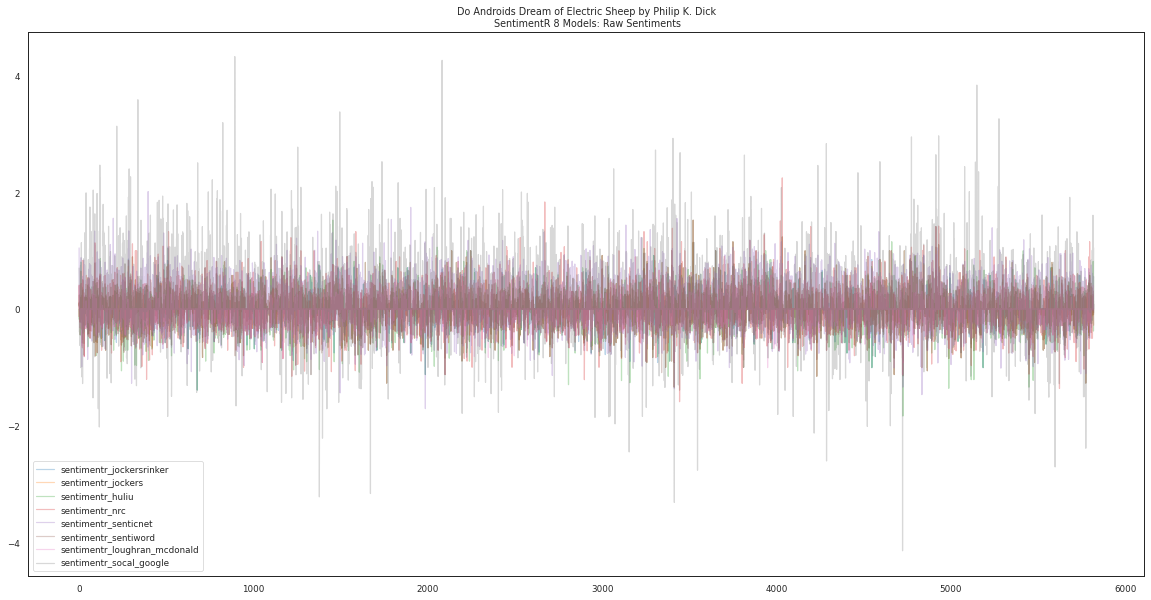

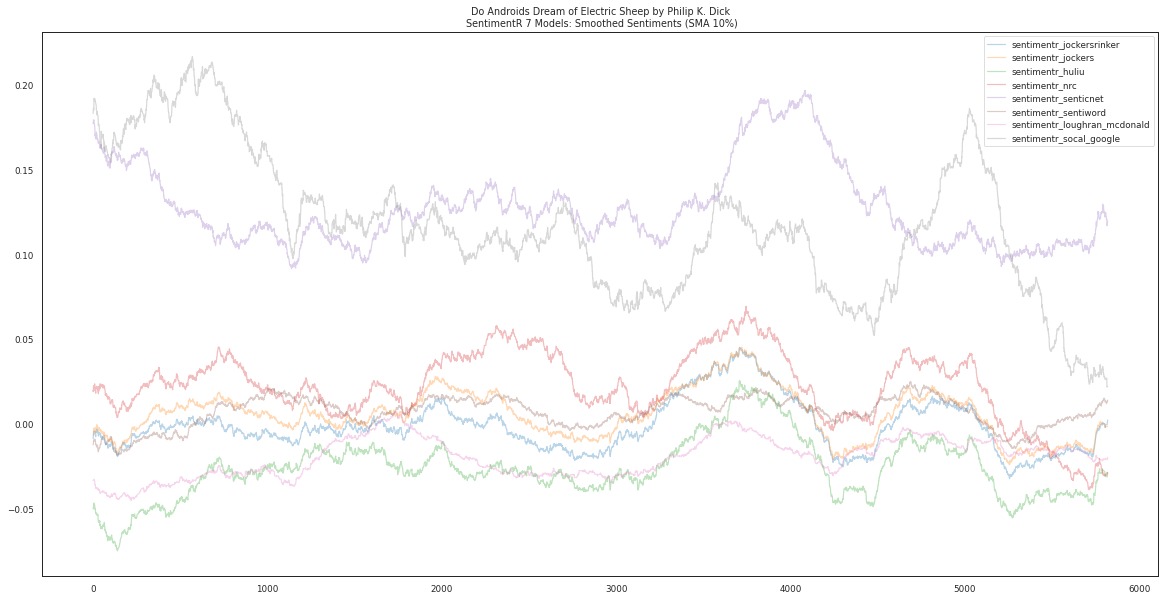

In [95]:
# Verify 8 SentimentR Models with Plots

for i, anovel in enumerate(list(corpus_texts_dt.keys())):

  print(f'Novel #{i}: {global_vars.corpus_titles_dt[anovel][0]}')

  # Raw Sentiments 
  fig = corpus_texts_dt[anovel][cols_sentimentr_ls].plot(title=f'{global_vars.corpus_titles_dt[anovel][0]}\n SentimentR 8 Models: Raw Sentiments', alpha=0.3)
  # plt.show();

  if Save_Raw_Plots:
    # save_filename = f'{global_vars.SUBDIR_GRAPHS}plot_sentimentr_raw_{anovel}_dpi{Resolution_in_dpi}.png'
    save_filename = f'{Path_to_SentimentArcs}{global_vars.SUBDIR_GRAPHS[2:]}plot_{anovel}_sentimentr_raw_dpi{Resolution_in_dpi}.png'
    print(f'\n\nSaving to: {save_filename}')
    plt.savefig(save_filename, dpi=int(Resolution_in_dpi))

  
  # Smoothed Sentiments (SMA 10%)
  # novel_sample = 'cdickens_achristmascarol'
  win_10per = int(corpus_texts_dt[anovel].shape[0] * 0.1)
  corpus_texts_dt[anovel][cols_sentimentr_ls].rolling(win_10per, center=True, min_periods=0).mean().plot(title=f'{global_vars.corpus_titles_dt[anovel][0]}\n SentimentR 7 Models: Smoothed Sentiments (SMA 10%)', alpha=0.3)
  # plt.show();

  if Save_Smooth_Plots:
    # save_filename = f'{global_vars.SUBDIR_GRAPHS}plot_sentimentr_smooth10sma_{anovel}_dpi{Resolution_in_dpi}.png'
    save_filename = f'{Path_to_SentimentArcs}{global_vars.SUBDIR_GRAPHS[2:]}plot_{anovel}_sentimentr_smooth_dpi{Resolution_in_dpi}.png'
    print(f'\n\nSaving to: {save_filename}')
    plt.savefig(save_filename, dpi=int(Resolution_in_dpi))


In [96]:
corpus_texts_ls

['pkdick_doandroidsdreamofelectricsheep']

In [97]:
text_indx = 0

corpus_texts_dt[corpus_texts_ls[text_indx]].head()

,text_raw,text_clean,syuzhetr_syuzhet,syuzhetr_bing,syuzhetr_afinn,syuzhetr_nrc,sentimentr_jockersrinker,sentimentr_jockers,sentimentr_huliu,sentimentr_nrc,sentimentr_senticnet,sentimentr_sentiword,sentimentr_loughran_mcdonald,sentimentr_socal_google
0,DO ANDROIDS DREAM OF ELECTRIC SHEEP?,do android dream of electric sheep,0.25,0,1,1.0,0.102062,0.102062,0.000000,0.408248,1.047565,0.089304,0.408248,0.701941
1,A merry little surge of electricity piped by a...,a merry little surge of electricity pipe by au...,1.05,0,1,1.0,0.055902,0.055902,-0.178885,-0.134164,0.211935,0.029814,0.000000,0.565133
2,Surprised - it always surprised him to find hi...,surprise it always surprise him to find himsel...,0.60,0,1,1.0,0.240000,0.240000,0.000000,0.400000,0.177200,0.120833,0.000000,-0.396120
3,"Now, in her bed, his wife Iran opened her gray...",now in her bed his wife iran open her gray unm...,-0.80,0,-3,-1.0,-0.178885,-0.178885,0.000000,-0.223607,-0.027056,-0.023292,-0.223607,0.627721
4,"""You set your Penfield too weak he said to her.",you set your penfield too weak he say to her,-0.50,-1,-2,0.0,-0.158114,-0.158114,-0.316228,0.000000,0.053442,-0.071151,-0.316228,-0.426152


In [98]:
# Retrieve a range of Lines from the Text

sentence_start = 50
sentence_end = 60

' '.join(list(corpus_texts_dt[corpus_texts_ls[text_indx]].iloc[sentence_start:sentence_end]['text_raw']))

'My first reaction consisted of being grateful that we could afford a Penfield mood organ. But then I read how unhealthy it was, sensing the absence of life, not just in this building but everywhere, and not reacting - do you see? I guess you don\'t. But that used to be considered a sign of mental illness; they called it \'absence of appropriate affect.\' So I left the TV sound off and I sat down at my mood organ and I experimented. And I finally found a setting for despair." Her dark, pert face showed satisfaction, as if she had achieved something of worth. "So I put it on my schedule for twice a month; I think that\'s a reasonable amount of time to feel hopeless about everything, about staying here on Earth after everybody who\'s small has emigrated, don\'t you think?" "But a mood like that," Rick said, "you\'re apt to stay in it, not dial your way out. Despair like that, about total reality, is self-perpetuating."'

# **END OF NOTEBOOK**

---